In [30]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
from scipy.optimize import curve_fit
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [31]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/"
rm_inpath = '/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/redmapper/full_pmem/cosmoDC2_v1.1.4_redmapper_v0.8.1/'

In [32]:
am_path = inpath+'AMICO/amico_cats/amico_map_associations_flxzb_mag/mag_i/'
rm_path = rm_inpath + 'Catalog.fits'

In [ ]:
am = Table.read(am_path)
rm = Table.read(rm_path)

In [44]:
from matplotlib.patches import Rectangle

Text(0.5, 1.0, 'AMICO richness vs z')

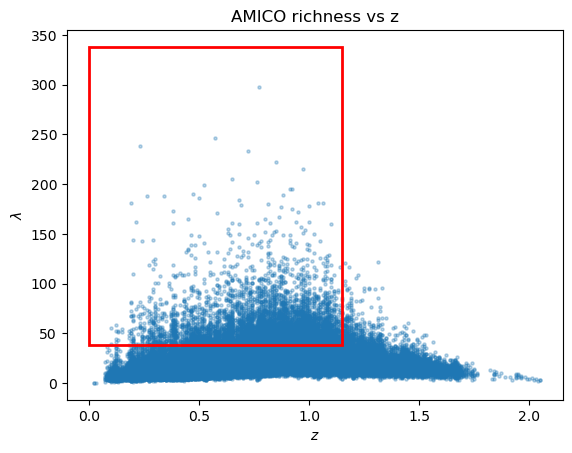

In [52]:
plt.scatter(am['z'], am['mass'], s=5, alpha = .3)
plt.gca().add_patch(Rectangle((0,38),1.15,300,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
plt.ylabel('$\lambda$')
plt.xlabel('$z$')
plt.title('AMICO richness vs z')

In [24]:
am_c = Table.read(am_path + 'Catalog_ls39z115.fits')

In [25]:
rm_c = Table.read('/sps/lsst/groups/clusters/amico_validation_project/catalogs/RedMapper/Catalog_ls17.fits')

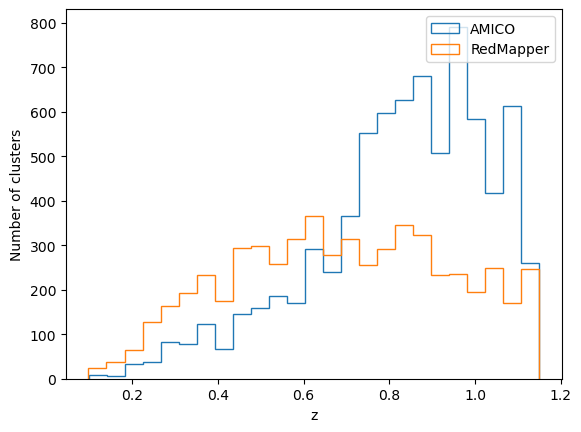

In [29]:
plt.hist(am_c['z'],bins = 25, histtype = 'step', label = 'AMICO')
plt.hist(rm_c['z'],bins = 25, histtype = 'step', label = 'RedMapper')
plt.xlabel('z')
plt.ylabel('Number of clusters')
plt.legend()

In [25]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/'

In [26]:
c1 = ClCatalog.read(path+'c1_p.fits', 'c1', full = True)
c2 = ClCatalog.read(path+'c2_p.fits', 'c2', full = True)

In [33]:
matching_folder = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/'

In [34]:
#output_matched_catalog(matching_folder+'c1_p.fits', matching_folder+'c2_p.fits',matching_folder+'output_catalog_' + 'p' +'.fits', c1, c2, matching_type='cross', overwrite=True)
supercat = Table.read(matching_folder+'psupercatalog.fits')

In [35]:
supercat

cat12-1_id,cat12-1_ra,cat12-1_dec,cat12-1_z,cat12-1_mass,cat12-1_mt_self,cat12-1_mt_other,cat12-1_mt_multi_self,cat12-1_mt_multi_other,cat12-1_mt_cross,cat12-2_id,cat12-2_ra,cat12-2_dec,cat12-2_z,cat12-2_mass,cat12-2_z_true,cat12-2_log_mass,cat12-2_mt_self,cat12-2_mt_other,cat12-2_mt_multi_self,cat12-2_mt_multi_other,cat12-2_mt_cross,cat13-1_id,cat13-1_ra,cat13-1_dec,cat13-1_z,cat13-1_mass,cat13-1_mt_self,cat13-1_mt_other,cat13-1_mt_multi_self,cat13-1_mt_multi_other,cat13-1_mt_cross,cat13-3_id,cat13-3_ra,cat13-3_dec,cat13-3_z,cat13-3_mass,cat13-3_log_mass,cat13-3_m200c,cat13-3_log_m200c,cat13-3_mt_self,cat13-3_mt_other,cat13-3_mt_multi_self,cat13-3_mt_multi_other,cat13-3_mt_cross,cat23-2_id,cat23-2_ra,cat23-2_dec,cat23-2_z,cat23-2_mass,cat23-2_z_true,cat23-2_log_mass,cat23-2_mt_self,cat23-2_mt_other,cat23-2_mt_multi_self,cat23-2_mt_multi_other,cat23-2_mt_cross,cat23-3_id,cat23-3_ra,cat23-3_dec,cat23-3_z,cat23-3_mass,cat23-3_log_mass,cat23-3_m200c,cat23-3_log_m200c,cat23-3_mt_self,cat23-3_mt_other,cat23-3_mt_multi_self,cat23-3_mt_multi_other,cat23-3_mt_cross
bytes32,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes34,bytes34,bytes32,bytes11,float64,float64,float32,float64,bytes13,bytes13,bytes175,bytes175,bytes13,bytes21,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes6,bytes45,bytes45,bytes6,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes164,bytes164,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32
1,50.113525,-40.03647,0.4399999976158142,75.694496,416,416,416,416,416,416,50.0986812400157,-40.041193422095496,0.43517646193504333,56.90526580810547,0.4322220981121063,1.7551524639129639,1,1,1,1,1,1,50.113525,-40.03647,0.44,75.694496,649700151338,649700151338,"125900151315,649700151338","125900151315,649700151338",649700151338,649700151338,50.11509823129538,-40.03536446556387,0.4336901903152466,2.914e+14,14.46455263904217,307207389507064.8,14.487431657920492,1,1,1,1,1,10,52.520436430812914,-25.717996124671657,0.513512909412384,190.70664978027344,0.5107235312461853,2.2803659439086914,1162500021323,1162500021323,"205900021323,80500021323,1162500021323,711400021315,922700021315","205900021323,80500021323,1162500021323,711400021315,922700021315",1162500021323,1162500021323,52.520436430812914,-25.717996124671657,0.5133163928985596,5.462e+14,14.737315348637217,326491145207346.5,14.513871407235179,10,10,10,10,10
2,50.642569,-41.402661,0.20000000298023224,62.659902,449,449,449,449,449,449,50.642098246561304,-41.40092456771352,0.19257621467113495,54.037330627441406,0.19309519231319427,1.7326939105987549,2,2,"2,85","2,85",2,2,50.642569,-41.402661,0.2,62.659902,130200151411,130200151411,"130200151411,220600151392,227500151382","130200151411,220600151392,227500151382",130200151411,130200151411,50.642098246561304,-41.40092456771352,0.19159162044525146,2.639e+14,14.421495474089287,229655937300912.7,14.361077677725604,2,2,"85,2","85,2",2,18,56.920376528125075,-27.20434071042304,0.571269690990448,179.1281280517578,0.5740296840667725,2.2531638145446777,549500032315,549500032315,549500032315,549500032315,549500032315,549500032315,56.920376528125075,-27.20434071042304,0.5722380876541138,1.010e+15,15.004121539929498,645749230889104.2,14.810063897585088,18,18,18,18,18
3,50.421896,-39.587457,0.38999998569488525,48.460455,1575,1575,"1575,35835","35835,1575",1575,1575,50.42203362588924,-39.587746579168694,0.39265477657318115,33.48888397216797,0.3885524570941925,1.5249006748199463,3,3,"3,532,248","3,532,248",3,3,50.421896,-39.587457,0.39,48.460455,388500151355,388500151355,"388500151355,690600151338,359100151331,370000151373,683800151355,391900151338","388500151355,690600151338,359100151331,370000151373,683800151355,391900151338",388500151355,388500151355,50.42203362588924,-39.587746579168694,0.3911494016647339,1.547e+14,14.189385464227009,1451629

In [41]:
c_merged12 = supercat[supercat['cat12-1_ra']>0]
c_merged13 = supercat[supercat['cat13-1_ra']>0]
c_merged23 = supercat[supercat['cat23-2_ra']>0]

In [42]:
c_merged23

cat12-1_id,cat12-1_ra,cat12-1_dec,cat12-1_z,cat12-1_mass,cat12-1_mt_self,cat12-1_mt_other,cat12-1_mt_multi_self,cat12-1_mt_multi_other,cat12-1_mt_cross,cat12-2_id,cat12-2_ra,cat12-2_dec,cat12-2_z,cat12-2_mass,cat12-2_z_true,cat12-2_log_mass,cat12-2_mt_self,cat12-2_mt_other,cat12-2_mt_multi_self,cat12-2_mt_multi_other,cat12-2_mt_cross,cat13-1_id,cat13-1_ra,cat13-1_dec,cat13-1_z,cat13-1_mass,cat13-1_mt_self,cat13-1_mt_other,cat13-1_mt_multi_self,cat13-1_mt_multi_other,cat13-1_mt_cross,cat13-3_id,cat13-3_ra,cat13-3_dec,cat13-3_z,cat13-3_mass,cat13-3_log_mass,cat13-3_m200c,cat13-3_log_m200c,cat13-3_mt_self,cat13-3_mt_other,cat13-3_mt_multi_self,cat13-3_mt_multi_other,cat13-3_mt_cross,cat23-2_id,cat23-2_ra,cat23-2_dec,cat23-2_z,cat23-2_mass,cat23-2_z_true,cat23-2_log_mass,cat23-2_mt_self,cat23-2_mt_other,cat23-2_mt_multi_self,cat23-2_mt_multi_other,cat23-2_mt_cross,cat23-3_id,cat23-3_ra,cat23-3_dec,cat23-3_z,cat23-3_mass,cat23-3_log_mass,cat23-3_m200c,cat23-3_log_m200c,cat23-3_mt_self,cat23-3_mt_other,cat23-3_mt_multi_self,cat23-3_mt_multi_other,cat23-3_mt_cross
bytes32,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes34,bytes34,bytes32,bytes11,float64,float64,float32,float64,bytes13,bytes13,bytes175,bytes175,bytes13,bytes21,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes6,bytes45,bytes45,bytes6,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes164,bytes164,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32
1,50.113525,-40.03647,0.4399999976158142,75.694496,416,416,416,416,416,416,50.0986812400157,-40.041193422095496,0.43517646193504333,56.90526580810547,0.4322220981121063,1.7551524639129639,1,1,1,1,1,1,50.113525,-40.03647,0.44,75.694496,649700151338,649700151338,"125900151315,649700151338","125900151315,649700151338",649700151338,649700151338,50.11509823129538,-40.03536446556387,0.4336901903152466,2.914e+14,14.46455263904217,307207389507064.8,14.487431657920492,1,1,1,1,1,10,52.520436430812914,-25.717996124671657,0.513512909412384,190.70664978027344,0.5107235312461853,2.2803659439086914,1162500021323,1162500021323,"205900021323,80500021323,1162500021323,711400021315,922700021315","205900021323,80500021323,1162500021323,711400021315,922700021315",1162500021323,1162500021323,52.520436430812914,-25.717996124671657,0.5133163928985596,5.462e+14,14.737315348637217,326491145207346.5,14.513871407235179,10,10,10,10,10
2,50.642569,-41.402661,0.20000000298023224,62.659902,449,449,449,449,449,449,50.642098246561304,-41.40092456771352,0.19257621467113495,54.037330627441406,0.19309519231319427,1.7326939105987549,2,2,"2,85","2,85",2,2,50.642569,-41.402661,0.2,62.659902,130200151411,130200151411,"130200151411,220600151392,227500151382","130200151411,220600151392,227500151382",130200151411,130200151411,50.642098246561304,-41.40092456771352,0.19159162044525146,2.639e+14,14.421495474089287,229655937300912.7,14.361077677725604,2,2,"85,2","85,2",2,18,56.920376528125075,-27.20434071042304,0.571269690990448,179.1281280517578,0.5740296840667725,2.2531638145446777,549500032315,549500032315,549500032315,549500032315,549500032315,549500032315,56.920376528125075,-27.20434071042304,0.5722380876541138,1.010e+15,15.004121539929498,645749230889104.2,14.810063897585088,18,18,18,18,18
3,50.421896,-39.587457,0.38999998569488525,48.460455,1575,1575,"1575,35835","35835,1575",1575,1575,50.42203362588924,-39.587746579168694,0.39265477657318115,33.48888397216797,0.3885524570941925,1.5249006748199463,3,3,"3,532,248","3,532,248",3,3,50.421896,-39.587457,0.39,48.460455,388500151355,388500151355,"388500151355,690600151338,359100151331,370000151373,683800151355,391900151338","388500151355,690600151338,359100151331,370000151373,683800151355,391900151338",388500151355,388500151355,50.42203362588924,-39.587746579168694,0.3911494016647339,1.547e+14,14.189385464227009,1451629

Text(0, 0.5, 'z$_{cat1}$')

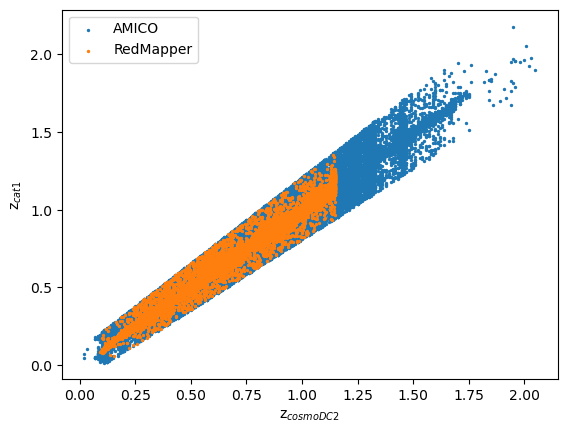

In [60]:
plt.scatter(c_merged13['cat13-1_z'],c_merged13['cat13-3_z'], s = 2, label = 'AMICO')
plt.scatter(c_merged23['cat23-2_z'],c_merged23['cat23-3_z'], s = 2, label = 'RedMapper')
plt.legend()
plt.xlabel('z$_{cosmoDC2}$')
plt.ylabel('z$_{cat1}$')

Text(0, 0.5, 'Number of clusters')

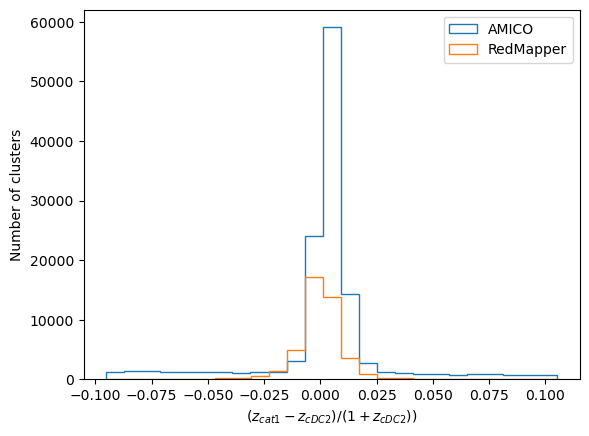

In [64]:
plt.hist((c_merged13['cat13-1_z']-c_merged13['cat13-3_z'])/(1+c_merged13['cat13-3_z']), label = 'AMICO', bins = 25, histtype = 'step')
plt.hist((c_merged23['cat23-2_z']-c_merged23['cat23-3_z'])/(1+c_merged23['cat23-3_z']), label = 'RedMapper', bins = 25, histtype = 'step')
plt.legend()
plt.xlabel('$(z_{cat1}-z_{cDC2})/(1+z_{cDC2}))$')
plt.ylabel('Number of clusters')